#  Effect of testosterone on blood counts metrics (hgb and hct)

# Import data into Pandas

In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_excel (r'C:\freelancing project\testosterone data collection+age edited.xlsx')

In [54]:
df.head()

,Age in years,Testosterone type,Route of administration,Baseline pre-testosterone hemoglobin/hematocrit,Peak hemoglobin/hematocrit on testosterone,When peak occurred,"Management (dose reduction, phlebotomy, etc)",Comment,Unnamed: 8
0,27,Cypionate,IM,14.6/43.4,15.6/45.9,within 72 months of starting,Dose reduced,"unclear reason for dose change, time frame coi...",NaN
1,19,Cypionate,SUBQ,12.7/42.7,13.6/45.8,3mo s/p start date,Dose reduced,"only one hgb/hct available after starting T, p...",NaN
2,30,Cypionate,IM,12.6/39.8,17.2/50,48 months,Dose reduced,On TC since 11/15,No CBC's checked
3,31,Cypionate,IM,13.3/37.8,16.2/47.5,48 months/p start date,Dose reduced,dosage change related to testosterone level be...,NaN
4,26,Cypionate,IM,14.35/42,18/53,23 months,Dose reduced,"Started TC IM 12/31/15, discussed switching to...",NaN


In [55]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
Age in years                                       234 non-null int64
Testosterone type                                  234 non-null object
Route of administration                            234 non-null object
Baseline pre-testosterone hemoglobin/hematocrit    234 non-null object
Peak hemoglobin/hematocrit on testosterone         233 non-null object
When peak occurred                                 217 non-null object
Management (dose reduction, phlebotomy, etc)       215 non-null object
Comment                                            129 non-null object
Unnamed: 8                                         37 non-null object
dtypes: int64(1), object(8)
memory usage: 16.5+ KB


# Cleaning the data and removing the missing data

Removing missing data and replace None with NaN

In [56]:
'DUPLICATE' in df.values


False

In [57]:
'DUPLICATE' in df['Age in years']
'DUPLICATE' in df['Testosterone type']
'DUPLICATE' in df['Route of administration']
'DUPLICATE' in df['Baseline pre-testosterone hemoglobin/hematocrit']
'DUPLICATE' in df['Peak hemoglobin/hematocrit on testosterone']
'DUPLICATE' in df['When peak occurred']
'DUPLICATE' in df['Management (dose reduction, phlebotomy, etc)']
'DUPLICATE' in df['Comment']

False

Replacing None with NaN

In [58]:
df.replace(to_replace =['None', 'none'] ,value =np.nan, inplace=True) 

# Cleaning Testosterone type Column


In [59]:

df['Testosterone type'].replace(to_replace =[''] ,value =np.nan, inplace=True) 


In [60]:
df['Testosterone type']

0                               Cypionate
1                               Cypionate
2                               Cypionate
3                               Cypionate
4                               Cypionate
5                               Cypionate
6                               Cypionate
7                               Cypionate
8                               Cypionate
9                               Cypionate
10                                      T
11                                      T
12                                      T
13                              Cypionate
14                              Cypionate
15                              Cypionate
16                              Cypionate
17                              Cypionate
18                              Cypionate
19                              Cypionate
20                              Cypionate
21                              Cypionate
22                              Cypionate
23                              Cy

In [61]:
df['Testosterone type'].value_counts()


Cypionate                             182
T                                      34
Testosterone enanthate                 10
Testosterone + TC                       5
Testosterone enanthate + Cypionate      2
Cypionate + Testosterone                1
Name: Testosterone type, dtype: int64

# Cleaning Route of administration column

In [62]:
df['Route of administration']

0                          IM
1                        SUBQ
2                          IM
3                          IM
4                          IM
5                          IM
6                          IM
7                          IM
8                          IM
9                        SUBQ
10            Transdermal gel
11            Transdermal gel
12            Transdermal gel
13                         IM
14                         IM
15                         IM
16                         IM
17                         IM
18                         IM
19                         IM
20                         IM
21                         IM
22     IM + Transdermal patch
23                       SUBQ
24                       SUBQ
25                       SUBQ
26                       SUBQ
27                         IM
28                         IM
29                       SUBQ
                ...          
204           Transdermal gel
205         Transdermal patch
206       

In [63]:
num = df.groupby(['Route of administration']).count() 


In [64]:
count = df['Route of administration'].value_counts() 


In [65]:
print(num) 

                         Age in years  Testosterone type  \
Route of administration                                    
IM                                153                153   
IM + SUBQ                           1                  1   
IM + Transdermal patch              4                  4   
Powder/cream                        1                  1   
SUBQ                               37                 37   
Transdermal gel                    28                 28   
Transdermal gel + IM                4                  4   
Transdermal gel + SUBQ              1                  1   
Transdermal patch                   5                  5   

                         Baseline pre-testosterone hemoglobin/hematocrit  \
Route of administration                                                    
IM                                                                   132   
IM + SUBQ                                                              1   
IM + Transdermal patch             

In [66]:
print(count)

IM                        153
SUBQ                       37
Transdermal gel            28
Transdermal patch           5
IM + Transdermal patch      4
Transdermal gel + IM        4
IM + SUBQ                   1
Transdermal gel + SUBQ      1
Powder/cream                1
Name: Route of administration, dtype: int64


# Cleaning Management (dose reduction, phlebotomy, etc) Column 

In [67]:
df['Management (dose reduction, phlebotomy, etc)'].count()


215

# Cleaning When peak occurred Column 

Removing Months from  When peak occurred Column and replacing None with NaN

In [68]:
df['When peak occurred'] = df['When peak occurred'].str.replace('months', '')
df['When peak occurred'] = df['When peak occurred'].str.replace('month after', '')
df['When peak occurred'] = df['When peak occurred'].str.replace('after', '')
df['When peak occurred'] = df['When peak occurred'].str.replace('month (days)', '')
df['When peak occurred'] = df['When peak occurred'].str.replace('mo s/p start date', '')
df['When peak occurred'] = df['When peak occurred'].str.replace('s/p start date', '')
df['When peak occurred'] = df['When peak occurred'].str.replace('of starting', '')
df['When peak occurred'] = df['When peak occurred'].str.replace('within', '')

df['When peak occurred'].replace(to_replace =['None', 'none'] ,value =np.nan, inplace=True) 


replacing  < 1 month (days) with value = 0.5 in When peak occurred Column 

In [69]:
df['When peak occurred'].replace(to_replace ='< 1 month (days)' ,value = 1) 
df['When peak occurred']= pd.to_numeric(df['When peak occurred'], errors='coerce')
df['When peak occurred'].dtypes



dtype('float64')

# Cleaning Baseline pre-testosterone hemoglobin/hematocrit column and Peak hemoglobin/hematocrit on testosterone column

In [70]:
#cleaning Baseline pre-testosterone hemoglobin/hematocrit column
#replacing None with NaN and removing words
#convert data type tp float
df['Baseline pre-testosterone hemoglobin/hematocrit'].replace(to_replace =['None', 'none'] ,value =np.nan,inplace=True) 
df['Baseline pre-testosterone hemoglobin/hematocrit'].replace(to_replace=r'^[a-zA-Z\s,?()]+', value='', regex=True,inplace=True)
df['Baseline pre-testosterone hemoglobin/hematocrit'] = df['Baseline pre-testosterone hemoglobin/hematocrit'].str.replace('2007 in FL', '')
df['Baseline pre-testosterone hemoglobin/hematocrit'] = df['Baseline pre-testosterone hemoglobin/hematocrit'].str.replace('2013', '')
df['Baseline pre-testosterone hemoglobin/hematocrit'] = df['Baseline pre-testosterone hemoglobin/hematocrit'].str.replace('2015', '')
df['Baseline pre-testosterone hemoglobin/hematocrit'].replace(to_replace =['None', 'none', ''] ,value =np.nan,inplace=True) 
df['Baseline pre hgb/htc'] = df['Baseline pre-testosterone hemoglobin/hematocrit']


In [71]:

df['Baseline pre-testosterone hemoglobin/hematocrit'] = df['Baseline pre-testosterone hemoglobin/hematocrit'].apply(lambda x: np.nan if x is np.nan else eval(x))


In [72]:
df['Baseline pre-testosterone hemoglobin/hematocrit']


0      0.336406
1      0.297424
2      0.316583
3      0.351852
4      0.341667
5      0.328016
6      0.339168
7      0.320652
8           NaN
9      0.339726
10     0.331620
11     0.337709
12     0.322957
13     0.331742
14          NaN
15          NaN
16     0.322816
17     0.341146
18     0.355316
19     0.340686
20     0.328321
21     0.322654
22     0.340979
23     0.346934
24     0.322799
25          NaN
26     0.328283
27     0.338971
28          NaN
29          NaN
         ...   
204    0.342394
205    0.342371
206    0.297229
207    0.330657
208         NaN
209    0.339332
210         NaN
211    0.340450
212    0.332606
213    0.333333
214         NaN
215    0.326260
216         NaN
217    0.331828
218    0.337070
219    0.341608
220    0.334399
221    0.332772
222    0.341204
223    0.328228
224    0.347123
225    0.333333
226    0.329582
227         NaN
228         NaN
229         NaN
230         NaN
231         NaN
232         NaN
233    0.337696
Name: Baseline pre-testo

In [73]:
#cleaning Peak hemoglobin/hematocrit on testosterone column
#replacing None with NaN and removing words
#convert data type tp float

df['Peak hemoglobin/hematocrit on testosterone'].replace(to_replace =['None', 'none'] ,value =np.nan,inplace=True) 
df['Peak hemoglobin/hematocrit on testosterone'].replace(to_replace=r'^[a-zA-Z\s,?()]+', value='', regex=True,inplace=True)
df['Peak hemoglobin/hematocrit on testosterone'].replace(to_replace =['None', 'none', ''] ,value =np.nan,inplace=True) 
df['Post hgb/htc']= df['Peak hemoglobin/hematocrit on testosterone']

In [74]:
df['Peak hemoglobin/hematocrit on testosterone'] = df['Peak hemoglobin/hematocrit on testosterone'].apply(lambda x: np.nan if x is np.nan else eval(x))

In [75]:
df['Peak hemoglobin/hematocrit on testosterone']

0      0.339869
1      0.296943
2      0.344000
3      0.341053
4      0.339623
5      0.323413
6      0.345924
7      0.339286
8      0.344538
9      0.344902
10     0.335260
11     0.340000
12     0.338000
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27     0.327519
28     0.324803
29     0.343750
         ...   
204    0.333333
205         NaN
206         NaN
207    0.336557
208    0.327309
209    0.341404
210    0.336493
211    0.337900
212    0.323789
213    0.337838
214    0.335878
215    0.324211
216    0.323251
217    0.325142
218    0.340726
219    0.328094
220    0.327751
221         NaN
222    0.342742
223    0.343750
224    0.344907
225         NaN
226    0.330073
227    0.319202
228    0.345009
229         NaN
230         NaN
231         NaN
232    0.345572
233    0.338824
Name: Peak hemoglobin/he

# Exploratory Data Analysis
Mean age

-Median time to peak

-Mean hgb/hct  pre and post

-Pecent over 17.6 hgb and 50% hct 

-Mean change in hemoglobin and hematocrit 

-Percent with each type of testosterone (IM, oral, transdermal)

-Mean peak with each type

-% with each management type (none, lower dose or phlebotomy)

# Mean age

In [76]:
# skip the Nan values while finding the median & mean 
df['Age in years'].mean() 

29.145299145299145

# Median time to peak

In [77]:
df['When peak occurred'].median(axis = 0, skipna = True) 

21.0

# Mean hgb/hct  pre and post

In [78]:
#Mean hgb/hct pre
df['Baseline pre-testosterone hemoglobin/hematocrit'].mean() 

0.3342346048156397

In [79]:
#mean hgb/hct post
df['Peak hemoglobin/hematocrit on testosterone'].mean() 

0.33351869480645685

# Pecent over 17.6 hgb and 50% hct

In [80]:
(df['Peak hemoglobin/hematocrit on testosterone'] > 0.352 ).mean()*100

3.8461538461538463

In [81]:
df[df['Peak hemoglobin/hematocrit on testosterone'] > 0.352]


,Age in years,Testosterone type,Route of administration,Baseline pre-testosterone hemoglobin/hematocrit,Peak hemoglobin/hematocrit on testosterone,When peak occurred,"Management (dose reduction, phlebotomy, etc)",Comment,Unnamed: 8,Baseline pre hgb/htc,Post hgb/htc
31,56,Cypionate,IM,0.344550,0.352490,60.0,NONE,NaN,NaN,13.72/39.82,18.4/52.2
55,29,Cypionate,IM,0.345013,0.353881,12.0,NONE,NaN,NaN,12.8/37.1,15.5/43.8
71,39,Cypionate,IM,0.354067,0.353430,18.0,NONE,NaN,NaN,14.8/41.8,17.0/48.1
99,25,Cypionate,IM,0.363218,0.352818,36.0,NONE,NaN,NaN,15.8/43.5,16.9/47.9
108,32,Cypionate,IM,0.338346,0.357918,60.0,NONE,NaN,NaN,13.5/39.9,16.5/46.1
110,56,Cypionate,IM,NaN,0.352113,12.0,NONE,NaN,NaN,NaN,15/42.6
124,26,Cypionate,IM,NaN,0.356481,22.0,NONE,Started TC IM 10/14,No CBC checked in 3 years,NaN,15.4/43.2
132,29,Cypionate,IM,0.348469,0.356195,21.0,NONE,Started TC IM 12/4/15,NaN,13.66/39.2,16.1/45.2
203,32,T,Transdermal gel,0.348581,0.353516,32.0,NONE,"Started transdermal gel 8/12/15, dose decrease...",NaN,17.07/48.97,18.1/51.2


# Mean change in hemoglobin and hematocrit

In [82]:
  
# new data frame with split value columns 
new = df["Baseline pre hgb/htc"].str.split("/", n = 1, expand = True) 
  
# making separate first pre hgb column from new data frame 
df["pre-testosterone Hgb"]= new[0] 
df["pre-testosterone Hgb"] = pd.to_numeric(df["pre-testosterone Hgb"], downcast="float")

# making separate last pre htc column from new data frame 
df["pre-testosterone Htc"]= new[1] 
df["pre-testosterone Htc"] = pd.to_numeric(df["pre-testosterone Htc"], downcast="float")


In [83]:
df["pre-testosterone Hgb"].mean()

13.473546028137207

In [84]:
df["pre-testosterone Htc"].mean()

40.30673599243164

In [85]:
  
# new data frame with split value columns 
new1 = df["Post hgb/htc"].str.split("/", n = 1, expand = True) 
  
# making separate first Post hgb column from new data frame 
df["post-testosterone peak Hgb"]= new1[0] 
df["post-testosterone peak Hgb"] = pd.to_numeric(df["post-testosterone peak Hgb"], downcast="float")


# making separate last Post htc column from new data frame 
df["post-testosterone peak Htc"]= new1[1]
df["post-testosterone peak Htc"] = pd.to_numeric(df["post-testosterone peak Htc"], downcast="float")


In [86]:
df["post-testosterone peak Hgb"].mean()

15.74777889251709

In [87]:
df["post-testosterone peak Htc"].mean()

47.206905364990234

In [88]:
df

,Age in years,Testosterone type,Route of administration,Baseline pre-testosterone hemoglobin/hematocrit,Peak hemoglobin/hematocrit on testosterone,When peak occurred,"Management (dose reduction, phlebotomy, etc)",Comment,Unnamed: 8,Baseline pre hgb/htc,Post hgb/htc,pre-testosterone Hgb,pre-testosterone Htc,post-testosterone peak Hgb,post-testosterone peak Htc
0,27,Cypionate,IM,0.336406,0.339869,72.0,Dose reduced,"unclear reason for dose change, time frame coi...",NaN,14.6/43.4,15.6/45.9,14.60,43.400002,15.600000,45.900002
1,19,Cypionate,SUBQ,0.297424,0.296943,3.0,Dose reduced,"only one hgb/hct available after starting T, p...",NaN,12.7/42.7,13.6/45.8,12.70,42.700001,13.600000,45.799999
2,30,Cypionate,IM,0.316583,0.344000,48.0,Dose reduced,On TC since 11/15,No CBC's checked,12.6/39.8,17.2/50,12.60,39.799999,17.200001,50.000000
3,31,Cypionate,IM,0.351852,0.341053,NaN,Dose reduced,dosage change related to testosterone level be...,NaN,13.3/37.8,16.2/47.5,13.30,37.799999,16.200001,47.500000
4,26,Cypionate,IM,0.341667,0.339623,23.0,Dose reduced,"Started TC IM 12/31/15, discussed switching to...",NaN,14.35/42,18/53,14.35,42.000000,18.000000,53.000000
5,33,Cypionate,IM,0.328016,0.323413,19.0,Dose reduced,Been on TC IM since at least 8/17.,NaN,13.16/40.12,16.3/50.4,13.16,40.119999,16.299999,50.400002
6,31,Cypionate,IM,0.339168,0.345924,63.0,Dose reduced,Started transdermal gel and/or test propionate...,NaN,15.5/45.7,17.4/50.3,15.50,45.700001,17.400000,50.299999
7,27,Cypionate,IM,0.320652,0.339286,20.0,Dose reduced,Started TC IM 6/9/17,NaN,11.8/36.8,17.1/50.4,11.80,36.799999,17.100000,50.400002
8,37,Cypionate,IM,NaN,0.344538,192.0,Dose reduced,Been on TC IM and pellets since 2003. Stopped ...,NaN,NaN,16.4/47.6,NaN,NaN,16.400000,47.599998
9,28,Cypionate,SUBQ,0.339726,0.344902,9.0,Dose reduced,"Been on TC since 11/17, started 0.5 qweek -> 0...",NaN,12.4/36.5,15.9/46.1,12.40,36.500000,15.900000,46.099998


# Percent with each type of testosterone (IM, oral, transdermal)

In [89]:
df['no_missing_column'] = 'non-missing'
dfg = df.groupby(['Route of administration', 'Testosterone type'])['no_missing_column'].count()
dfg.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

Route of administration  Testosterone type                 
IM                       Cypionate                              94.771242
                         Testosterone enanthate                  3.921569
                         Testosterone enanthate + Cypionate      1.307190
IM + SUBQ                Cypionate                             100.000000
IM + Transdermal patch   Cypionate                              75.000000
                         Cypionate + Testosterone               25.000000
Powder/cream             T                                     100.000000
SUBQ                     Cypionate                              89.189189
                         Testosterone enanthate                 10.810811
Transdermal gel          T                                     100.000000
Transdermal gel + IM     Testosterone + TC                     100.000000
Transdermal gel + SUBQ   Testosterone + TC                     100.000000
Transdermal patch        T                          

In [90]:
df['no_missing_column'] = 'non-missing'
dfg = df.groupby(['Route of administration', 'Testosterone type'])['no_missing_column'].count()/234 *100
dfg

Route of administration  Testosterone type                 
IM                       Cypionate                             61.965812
                         Testosterone enanthate                 2.564103
                         Testosterone enanthate + Cypionate     0.854701
IM + SUBQ                Cypionate                              0.427350
IM + Transdermal patch   Cypionate                              1.282051
                         Cypionate + Testosterone               0.427350
Powder/cream             T                                      0.427350
SUBQ                     Cypionate                             14.102564
                         Testosterone enanthate                 1.709402
Transdermal gel          T                                     11.965812
Transdermal gel + IM     Testosterone + TC                      1.709402
Transdermal gel + SUBQ   Testosterone + TC                      0.427350
Transdermal patch        T                                      

In [91]:
df['Testosterone type'].value_counts()

Cypionate                             182
T                                      34
Testosterone enanthate                 10
Testosterone + TC                       5
Testosterone enanthate + Cypionate      2
Cypionate + Testosterone                1
Name: Testosterone type, dtype: int64

In [92]:
df['Testosterone type'].value_counts()/234 *100

Cypionate                             77.777778
T                                     14.529915
Testosterone enanthate                 4.273504
Testosterone + TC                      2.136752
Testosterone enanthate + Cypionate     0.854701
Cypionate + Testosterone               0.427350
Name: Testosterone type, dtype: float64

In [93]:
df['Route of administration'].value_counts()

IM                        153
SUBQ                       37
Transdermal gel            28
Transdermal patch           5
IM + Transdermal patch      4
Transdermal gel + IM        4
IM + SUBQ                   1
Transdermal gel + SUBQ      1
Powder/cream                1
Name: Route of administration, dtype: int64

In [94]:
df['Route of administration'].value_counts()/234 *100

IM                        65.384615
SUBQ                      15.811966
Transdermal gel           11.965812
Transdermal patch          2.136752
IM + Transdermal patch     1.709402
Transdermal gel + IM       1.709402
IM + SUBQ                  0.427350
Transdermal gel + SUBQ     0.427350
Powder/cream               0.427350
Name: Route of administration, dtype: float64

# Mean peak with each type of testosterone (IM, oral, transdermal)

In [95]:
dfg = df.groupby(['Route of administration', 'Testosterone type'])['Peak hemoglobin/hematocrit on testosterone'].mean()
dfg

Route of administration  Testosterone type                 
IM                       Cypionate                             0.333756
                         Testosterone enanthate                0.328993
                         Testosterone enanthate + Cypionate    0.324638
IM + SUBQ                Cypionate                             0.328160
IM + Transdermal patch   Cypionate                             0.327459
                         Cypionate + Testosterone              0.344086
Powder/cream             T                                     0.330918
SUBQ                     Cypionate                             0.332593
                         Testosterone enanthate                0.343800
Transdermal gel          T                                     0.334286
Transdermal gel + IM     Testosterone + TC                     0.333851
Transdermal gel + SUBQ   Testosterone + TC                     0.324211
Transdermal patch        T                                     0.335090
Name

# % with each management type (none, lower dose or phlebotomy)

In [96]:
df.groupby(['Route of administration', 'Testosterone type'])['Management (dose reduction, phlebotomy, etc)'].count()


Route of administration  Testosterone type                 
IM                       Cypionate                             132
                         Testosterone enanthate                  6
                         Testosterone enanthate + Cypionate      2
IM + SUBQ                Cypionate                               1
IM + Transdermal patch   Cypionate                               2
                         Cypionate + Testosterone                1
Powder/cream             T                                       1
SUBQ                     Cypionate                              29
                         Testosterone enanthate                  4
Transdermal gel          T                                      27
Transdermal gel + IM     Testosterone + TC                       4
Transdermal gel + SUBQ   Testosterone + TC                       1
Transdermal patch        T                                       5
Name: Management (dose reduction, phlebotomy, etc), dtype: int64

In [97]:
df['Management (dose reduction, phlebotomy, etc)'].value_counts()

NONE            202
Dose reduced     13
Name: Management (dose reduction, phlebotomy, etc), dtype: int64

In [98]:
df['Management (dose reduction, phlebotomy, etc)'].value_counts()/234 *100

NONE            86.324786
Dose reduced     5.555556
Name: Management (dose reduction, phlebotomy, etc), dtype: float64

In [99]:
df.groupby(['Route of administration', 'Testosterone type','Management (dose reduction, phlebotomy, etc)'])['Management (dose reduction, phlebotomy, etc)'].count()/234*100


Route of administration  Testosterone type                   Management (dose reduction, phlebotomy, etc)
IM                       Cypionate                           Dose reduced                                     3.418803
                                                             NONE                                            52.991453
                         Testosterone enanthate              NONE                                             2.564103
                         Testosterone enanthate + Cypionate  NONE                                             0.854701
IM + SUBQ                Cypionate                           NONE                                             0.427350
IM + Transdermal patch   Cypionate                           NONE                                             0.854701
                         Cypionate + Testosterone            NONE                                             0.427350
Powder/cream             T                                   

In [100]:
df.to_csv(r'C:\freelancing project\newdf.xlsx')


# Hgb Plot 

In [101]:
import seaborn as sns

In [103]:
new = df[['pre-testosterone Hgb','post-testosterone peak Hgb','no_missing_column']].copy()
new

,pre-testosterone Hgb,post-testosterone peak Hgb,no_missing_column
0,14.60,15.600000,non-missing
1,12.70,13.600000,non-missing
2,12.60,17.200001,non-missing
3,13.30,16.200001,non-missing
4,14.35,18.000000,non-missing
5,13.16,16.299999,non-missing
6,15.50,17.400000,non-missing
7,11.80,17.100000,non-missing
8,NaN,16.400000,non-missing
9,12.40,15.900000,non-missing


In [105]:
new01 = df[['pre-testosterone Htc','post-testosterone peak Htc','no_missing_column']].copy()


In [106]:
new=new.melt(id_vars='no_missing_column', var_name='Hgb', value_name='Value')
new01=new01.melt(id_vars='no_missing_column', var_name='Htc', value_name='Value')

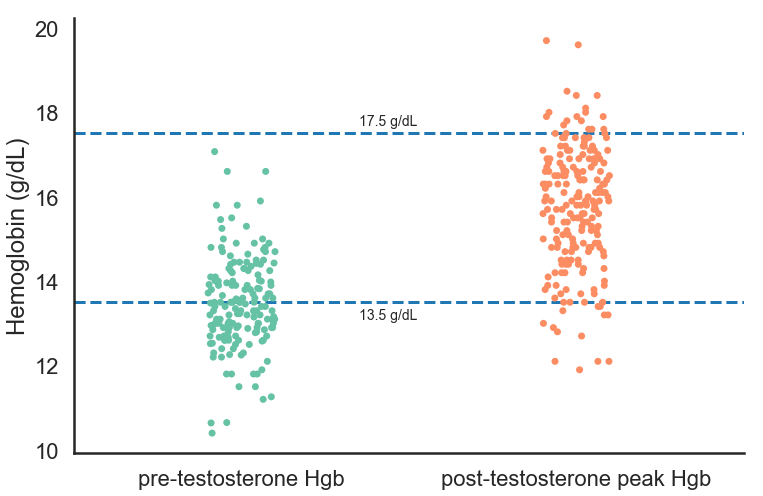

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(12,8))
ax = sns.stripplot(x="Hgb", y="Value", data=new, jitter=1, palette="Set2", dodge=True, size = 7)
ax.set(xlabel="", ylabel = "Hemoglobin (g/dL)")
ax.axhline(13.5, ls='--')
ax.axhline(17.5, ls='--')
ax.text(.35,13.1, "13.5 g/dL", fontsize=14)
ax.text(.35,17.7, "17.5 g/dL", fontsize=14)


sns.set_context("poster")
sns.despine()


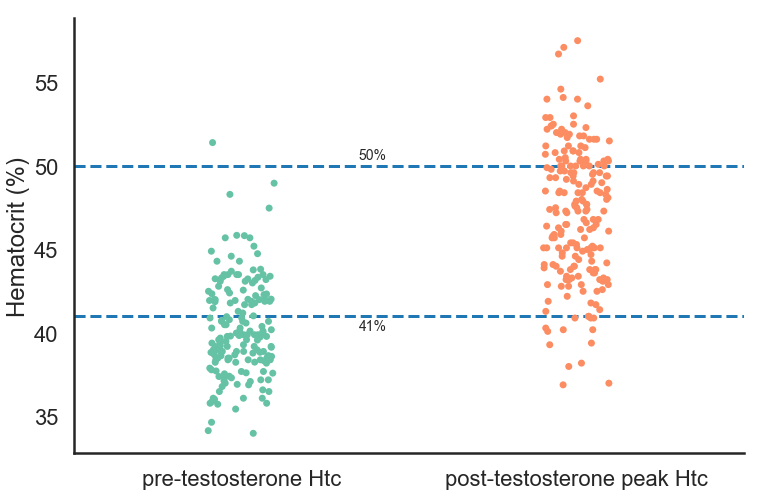

In [111]:
import matplotlib.pyplot as plt
sns.set_style("white")
plt.figure(figsize=(12,8))
ax1 = sns.stripplot(x="Htc", y="Value", data=new01, jitter=1, palette="Set2", dodge=True, size = 7)
ax1.set(xlabel="", ylabel = "Hematocrit (%)")
ax1.axhline(41, ls='--')
ax1.axhline(50, ls='--')
ax1.text(.35,40.2, "41%", fontsize=14)
ax1.text(.35,50.4, "50%", fontsize=14)

sns.set_context("poster")
sns.despine()



In [112]:
def group_age(age_df):
    if age_df <= 25:
        return "Age <= 25"
    elif age_df <= 35:
        return "25 < Age <= 35"
    else:
        return "Age > 35"
    
df["Age group"] = df['Age in years'].apply(group_age)

In [113]:
df["Age group"].value_counts()

25 < Age <= 35    94
Age <= 25         92
Age > 35          48
Name: Age group, dtype: int64

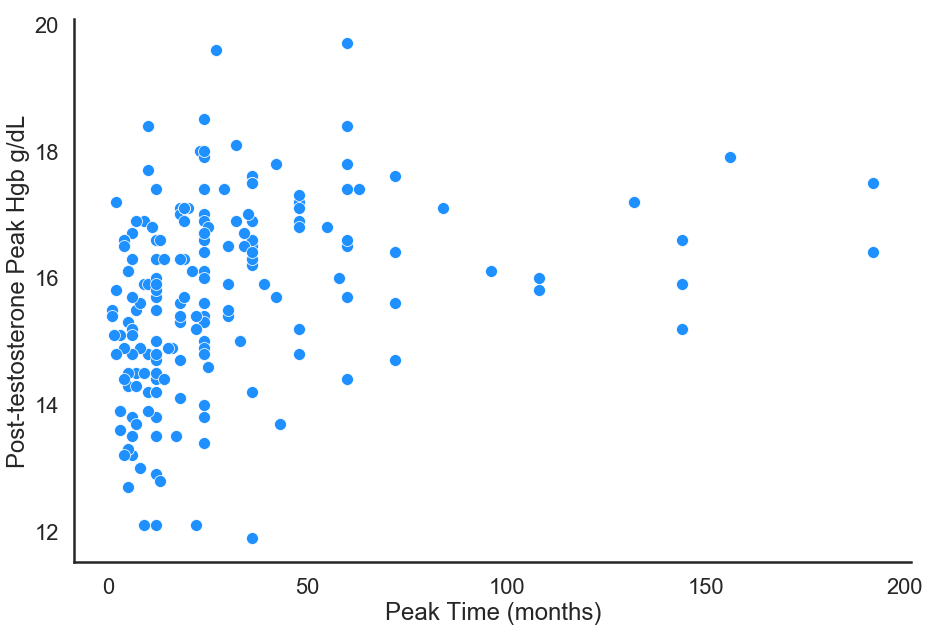

In [139]:
import matplotlib.pyplot as plt
sns.set_style("white")
plt.figure(figsize=(15,10))
ax02 = sns.scatterplot(x="When peak occurred", y="post-testosterone peak Hgb", data=df, palette ='Set2' ,color='dodgerblue')
ax02.set(xlabel="Peak Time (months)", ylabel = "Post-testosterone Peak Hgb g/dL")
plt.yticks([12, 14, 16, 18,20])
plt.xticks([0, 50, 100, 150,200])


sns.set_context("poster")
sns.despine()

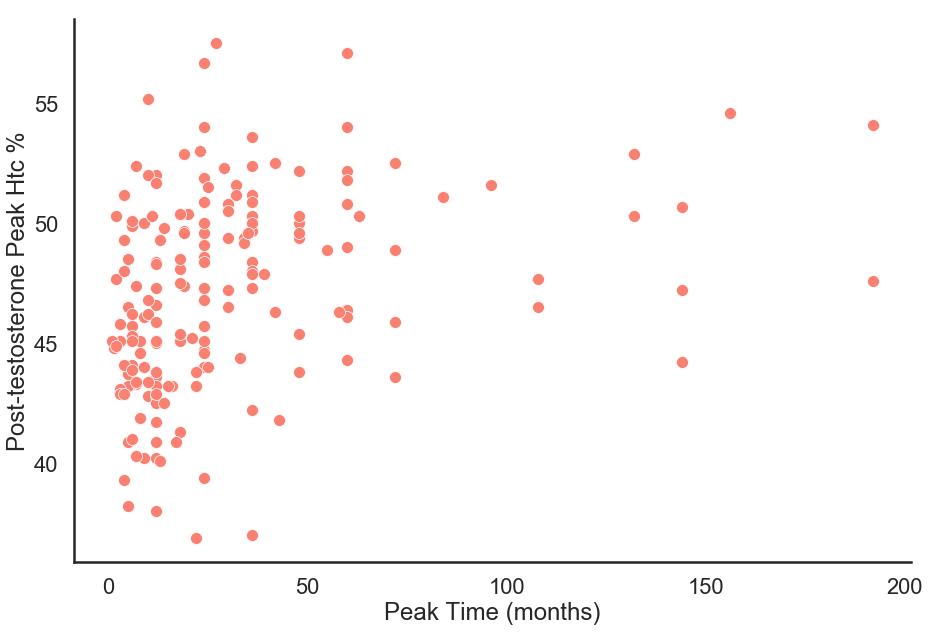

In [140]:
import matplotlib.pyplot as plt
sns.set_style("white")
plt.figure(figsize=(15,10))
ax02 = sns.scatterplot(x="When peak occurred", y="post-testosterone peak Htc", data=df, palette ='Set2' ,color='salmon')
ax02.set(xlabel="Peak Time (months)", ylabel = "Post-testosterone Peak Htc %")

plt.xticks([0, 50, 100, 150,200])

sns.set_context("poster")
sns.despine()

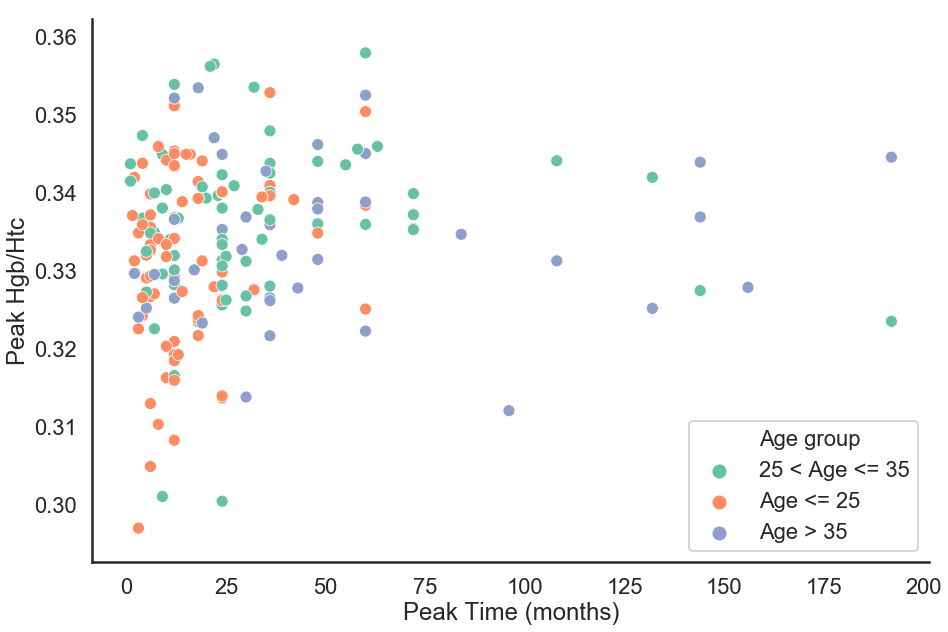

In [130]:
import matplotlib.pyplot as plt
sns.set_style("white")
plt.figure(figsize=(15,10))
ax02 = sns.scatterplot(x="When peak occurred", y="Peak hemoglobin/hematocrit on testosterone",hue="Age group", data=df, palette ='Set2' ,color='red')
ax02.set(xlabel="Peak Time (months)", ylabel = "Peak Hgb/Htc")

sns.set_context("poster")
sns.despine()